# Transfer Learning Pytorch

In [68]:
import torch
from torchvision import datasets,models,transforms
from torch import optim
import torch.nn as nn
import numpy as np
import os
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import torchvision
import copy

## load dataset


In [60]:
# transform of data
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

data_transforms = {
    "train" : transforms.Compose([
     transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean , std= std),    
    ]),
    
    "val" : transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean , std= std),
    
    ])}

In [61]:
dataset_address = "./dataset/"
data_types = ["train", "val"]
dataset = {data_type : datasets.ImageFolder(os.path.join(dataset_address , data_type) , data_transforms[data_type])
             for data_type in data_types}
data_loader ={ data_type : DataLoader(dataset[data_type] , shuffle=True , batch_size=8) for data_type in data_types}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


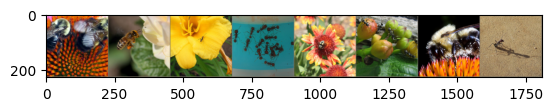

In [62]:
example_data, example_classes = next(iter(data_loader['train']))
example_grid = torchvision.utils.make_grid(example_data)
numpy_example_grid = example_grid.numpy()
numpy_example_grid = numpy_example_grid.transpose((1,2,0))
plt.imshow(numpy_example_grid*std + mean)
plt.savefig("hello.png")
plt.show()

# Create model

In [66]:
device = torch.device("cuda:0" if torch.cuda.is_available else "cpu")

In [72]:
model = models.resnet18(weights='IMAGENET1K_V1')
num_input_features = model.fc.in_features